
<a id='uncertainty-traps'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Armadilhas da Incerteza

## Conteúdo

- [Armadilhas da Incerteza](#Armadilhas-da-Incerteza)  
  - [Resumo](#Resumo)  
  - [O Modelo](#O-Modelo)  
  - [Implementação](#Implementação)  
  - [Resultados](#Resultados)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  
  - [Exercício 2](#Exercício-2)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Nessa aula estudaremos uma versão simplificada de um modelo de armadilha de incertezas de Fajgelbaum, Schaal e Taschereau-Dumouchel [[FSTD15]](https://julia.quantecon.org/../zreferences.html#fun).

O modelo apresenta incertezas auto-reforçadoras que têm grandes impactos na atividade econômica.

No modelo,

- Os fundamentos variam estocásticamente e não são totalmente observáveis.
- A qualquer momento, existem empresários ativos e inativos; somente empreendedores ativos produzem. 
- Os agentes - empresários ativos e inativos - têm crenças sobre os fundamentos expressos como distribuições de probabilidade.  
- Maior incerteza significa maiores dispersões dessas distribuições.
- Os empresários são avessos ao risco e, portanto, menos inclinados a serem ativos quando a incerteza é alta.  
- A produção de empreendedores ativos é observável, fornecendo um sinal barulhento que ajuda a todos dentro do modelo a inferir os fundamentos. 
- Os empresários atualizam suas crenças sobre os fundamentos usando a Lei de Bayes, implementada por meio da [filtragem de Kalman](https://julia.quantecon.org/../tools_and_techniques/kalman.html).  


As armadilhas da incerteza emergem porque:

- Alta incerteza desencoraja os empreendedores a se tornarem ativos.
- Um baixo nível de participação - ou seja, um número menor de empreendedores ativos - diminui o fluxo de informações sobre os fundamentos.  
- Menos informações se traduz em maior incerteza, desencorajando ainda mais os empreendedores a optarem por ser ativos, e assim por diante.


As armadilhas da incerteza decorrem de uma externalidade positiva: altos níveis agregados de atividade econômica geram informações valiosas.

## O Modelo

O modelo original descrito em [[FSTD15]](https://julia.quantecon.org/../zreferences.html#fun) tem muitas partes móveis interessantes.

Aqui, examinamos uma versão simplificada que, no entanto, captura muitas das idéias principais.

### Fundamentos

A evolução do processo fundamental $ \{\theta_t\} $ é dado por:

$$
\theta_{t+1} = \rho \theta_t + \sigma_{\theta} w_{t+1}
$$

onde

- $ \sigma_\theta > 0 $ e $ 0 < \rho < 1 $  
- $ \{w_t\} $ e IID e padrão normal


A variável aleatória $ \theta_t $ não é observável a qualquer momento.

### Produto

Existe um total de $ \bar M $ empresários aversos ao risco.

A produção do $ m $-ésimo empresário, com condição de ser ativo no mercado no momento $ t $, é igual a:


<a id='equation-xgt'></a>
$$
x_m = \theta + \epsilon_m
\quad \text{onde} \quad
\epsilon_m \sim N \left(0, \gamma_x^{-1} \right) \tag{1}
$$

Aqui o subescrito tempo foi descartado para simplificar a notação.

O inverso da variação de choque, $ \gamma_x $, é chamado de choque de **precisão**.

Quanto maior a precisão, mais informativo $ x_m $ é sobre o fundamento.

Os choques de produção são independentes ao longo do tempo e das empresas.

### Informações e Crenças

Todos os empreendedores começam com crenças idênticas sobre $ \theta_0 $.

Os sinais são publicamente observáveis e, portanto, todos os agentes sempre têm crenças idênticas.

Descartando subscritos de tempo, as crenças para $ \theta $ são representados pela distribuição normal $ N(\mu, \gamma^{-1}) $.

Aqui $ \gamma $ é a precisão das crenças; seu inverso é o grau de incerteza.

Esses parâmetros são atualizados pela filtragem do Kalman.

Seja

- $ \mathbb M \subset \{1, \ldots, \bar M\} $ o conjunto de empresas atualmente ativas  
- $ M := |\mathbb M| $ o número de empresas atualmente ativas
- $ X $ o produto médio $ \frac{1}{M} \sum_{m \in \mathbb M} x_m $ das firmas ativas


Com esta notação e números primos para os valores do próximo período, podemos escrever a atualização da média e precisão via


<a id='equation-update-mean'></a>
$$
\mu' = \rho \frac{\gamma \mu + M \gamma_x X}{\gamma + M \gamma_x} \tag{2}
$$


<a id='equation-update-prec'></a>
$$
\gamma' =
    \left(
    \frac{\rho^2}{\gamma + M \gamma_x} + \sigma_\theta^2
    \right)^{-1} \tag{3}
$$

Estes são os resultados padrão da filtragem de Kalman aplicados à configuração atual.

O Exercício 1 fornece mais detalhes sobre como [(2)](#equation-update-mean) e [(3)](#equation-update-prec) são derivados e, em seguida, solicita que você preencha as etapas restantes.

A figura a seguir mostra a lei do movimento para a precisão em [(3)](#equation-update-prec)
como um diagrama de 45 graus, com uma curva para cada $ M \in \{0, \ldots, 6\} $.

Os valores para os outros parâmetros são $ \rho = 0.99, \gamma_x = 0.5, \sigma_\theta =0.5 $

![1](https://github.com/pluiz30/Julia-Hub/assets/60633407/4bd04ebc-b186-4dcb-ac7b-c4baafe31011)  
Os pontos em que as curvas atingem as linhas de 45 graus são estados estacionários para precisão de longo prazo para diferentes valores de $ M $.

Então, se um desses valores para $ M $ permanece fixo, um estado estacionário correspondente é o nível de precisão de equilíbrio

- maiores valores de $ M $ correspondem a mais informações sobre o processo fundamento e, portanto, mais precisão no estado estacionário
- menores valores de $ M $ correspondem a menos informações e mais incerteza no estado estacionário

Na prática, como veremos, o número de empresas ativas flutua estocasticamente.

### Participação

Omitindo os subscritos de tempo mais uma vez, os empreendedores entram no mercado no período atual se:


<a id='equation-pref1'></a>
$$
\mathbb E [ u(x_m - F_m) ] > c \tag{4}
$$

Aqui

- a expectativa matemática de $ x_m $ é baseada em [(1)](#equation-xgt) e crenças $ N(\mu, \gamma^{-1}) $ para $ \theta $  
- $ F_m $ é um custo fixo estocástico, mas previsível, independente ao longo do tempo e das empresas  
- $ c $ é um constante reflexo dos custos de oportunidade


A afirmação de que $ F_m $ é previsível significa que significa que é realizado no início do período e tratado como constante e [(4)](#equation-pref1).

A função utilidade possui a forma constante de aversão ao risco absoluto:


<a id='equation-pref2'></a>
$$
u(x) = \frac{1}{a} \left(1 - \exp(-a x) \right) \tag{5}
$$

onde $ a $ é um parâmetro positivo.

Combinando [(4)](#equation-pref1) e [(5)](#equation-pref2), o empresário $ m $ participa do mercado (ou é dito para ser ativo) quando:

$$
\frac{1}{a}
    \left\{
        1 - \mathbb E [ \exp \left(
            -a (\theta + \epsilon_m -  F_m)
                \right) ]
    \right\}
        > c
$$

Usando as fórumulas padrão de expectativas de variáveis aletórias [lognormal](https://en.wikipedia.org/wiki/Log-normal_distribution), isso é equivalente à condição:


<a id='equation-firm-test'></a>
$$
\psi(\mu, \gamma, F_m) :=
\frac{1}{a}
    \left(
        1 - \exp \left(
            -a \mu + a F_m +
            \frac{a^2 \left( \frac{1}{\gamma} + \frac{1}{\gamma_x} \right)}{2}
            \right)
    \right) - c > 0 \tag{6}
$$

## Implementação

Queremos simular essa economia.

Queremos um gerador de do tipo tupla nomeada do tipo que vimos antes.

E precisamos de métodos para atualizar $ \theta $, $ \mu $ and $ \gamma $, bem como para determinar o número de empresas ativas e seus resultados.

Os métodos de atualização seguem as leis do movimento para $ \theta $, $ \mu $ and $ \gamma $ dadas acima.

O método para avaliar o número de firmas ativas gera $ F_1,
\ldots, F_{\bar M} $ e testa a condição [(6)](#equation-firm-test) para cada firma.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using DataFrames, Parameters, Plots

In [3]:
UncertaintyTrapEcon = @with_kw (a = 1.5, # aversão ao risco
                                γ_x = 0.5, # precisão do choque de produção
                                ρ = 0.99, # coeficiênte de correlação para θ
                                σ_θ = 0.5, # desvio padrão do choque θ
                                num_firms = 100, # número de firmas
                                σ_F = 1.5, # desvio padrão dos pontos fixos
                                c = -420.0, # custos de oportunidades externos
                                μ_init = 0.0, # valores iniciais para μ
                                γ_init = 4.0, # valor inicial para γ
                                θ_init = 0.0, # valor inicial para θ
                                σ_x = sqrt(a / γ_x)) # desvio padão do choque

#3 (generic function with 2 methods)

Nos resultados abaixo, usamos esse código para simular séries temporais para as principais variáveis.

## Resultados

Vejamos primeiro a dinâmica de $ \mu $, que os agentes usam para rastrear  $ \theta $

![2](https://github.com/pluiz30/Julia-Hub/assets/60633407/d31abfb5-5344-4ab8-9720-e6ed05c71fec)  
Vemos que $ \mu $ rastreia $ \theta $ bem quando existem empresas suficientes no mercado.

No entanto, há momentos em que $ \mu $ rastreia $ \theta $ de forma ruim devido a informações insuficientes.

São episódios em que as armadilhas da incerteza se apoderam.

Durante esses episódios:

- A precisão é baixa e a incerteza é alta, e
- Poucas empresas estão no mercado.


Para ter uma idéia mais clara da dinâmica, vamos analisar todas as séries temporais principais de uma só vez, para um determinado conjunto de choques

![3](https://github.com/pluiz30/Julia-Hub/assets/60633407/21cc0e3a-ec78-4213-8f34-189d6cebe02d)

  
Observe como as armadilhas só acontecem depois de uma sequência de extrações ruins para o fundamental.

Assim, o modelo nos fornece um *mecanismo de propagação* que mapeia as extrações aleatórias ruins em longas retrações na atividade econômica.

## Exercícios


<a id='uncertainty-traps-ex1'></a>

### Exercício 1

Preencha os detalhes atrás de [(2)](#equation-update-mean) e [(3)](#equation-update-prec) com base no seguinte resultados padrão (consulte, por exemplo, p. 24 de [[YS05]](https://julia.quantecon.org/../zreferences.html#young2005)).

**Fato** se $ \mathbf x = (x_1, \ldots, x_M) $ é um vetor de extrações IID de uma distribuição comum $ N(\theta, 1/\gamma_x) $
e se $ \bar x $ é a média da amostra. Se $ \gamma_x $
é conhecido e anterior para $ \theta $ é $ N(\mu, 1/\gamma) $, então a distribuição posterior de $ \theta $ dado $ \mathbf x $ é

$$
\pi(\theta \,|\, \mathbf x) = N(\mu_0, 1/\gamma_0)
$$

onde


$$
\mu_0 = \frac{\mu \gamma + M \bar x \gamma_x}{\gamma + M \gamma_x}
\quad \text{e} \quad
\gamma_0 = \gamma + M \gamma_x
$$

### Exercício 2

Aleatoriedade do módulo, replique as figuras de simulação mostradas acima.

- Use os valores dos parâmetros listados como padrões na função `UncertyTrapEcon`.

## Soluções

### Exercício 1

Este exercício solicitou que você validasse as leis do movimento para
$ \gamma $ e $ \mu $ dada na aula, com base no resultado declarado sobre a atualização bayesiana em um cenário escalar gaussiano .

O resultado declarado nos diz que, após observar a produção média $ X $ da firma
$ M $, nossa crença posterior será

$$
N(\mu_0, 1/\gamma_0)
$$

onde

$$
\mu_0 = \frac{\mu \gamma + M X \gamma_x}{\gamma + M \gamma_x}
\quad \text{e} \quad
\gamma_0 = \gamma + M \gamma_x
$$

Se tomamos uma variável aleatória $ \theta $ com esta distribuição e, em seguida, avaliar a distribuição de $ \rho \theta + \sigma_\theta w $
onde $ w $ é independente e padrão normal, obtemos as expressões para $ \mu' $ e $ \gamma' $ dadas na aula.

## Exercicio 2

Primeiro, vamos replicar o gráfico que ilustra a lei do movimento para obter precisão, que é:

$$
\gamma_{t+1} =
    \left(
    \frac{\rho^2}{\gamma_t + M \gamma_x} + \sigma_\theta^2
    \right)^{-1}
$$

Aqui $ M $ é o número de firmas ativas. A próxima figura plota
$ \gamma_{t+1} $ contra $ \gamma_t $ em um diagrama de 45 graus para diferentes valores de $ M $

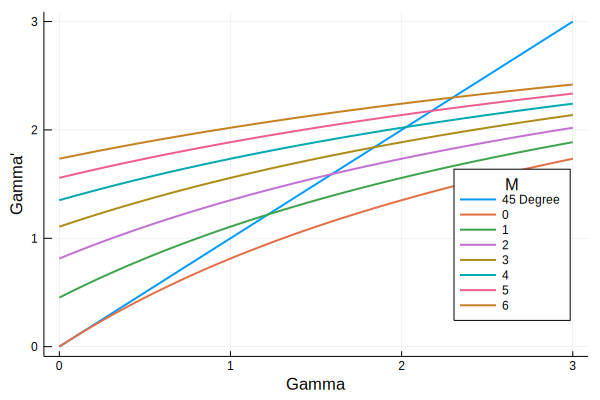

In [4]:
econ = UncertaintyTrapEcon()
@unpack ρ, σ_θ, γ_x = econ # simplifique os nomes

# grid para γ e γ_{t+1}
γ = range(1e-10, 3, length = 200)
M_range = 0:6
γp = 1 ./ (ρ^2 ./ (γ .+ γ_x .* M_range') .+ σ_θ^2)

labels = ["0", "1", "2", "3", "4", "5", "6"]

plot(γ, γ, lw = 2, label = "45 Degree")
plot!(γ, γp, lw = 2, label = labels)
plot!(xlabel = "Gamma", ylabel = "Gamma'", legend_title = "M", legend = :bottomright)

Os pontos em que as curvas atingem as linhas de 45 graus são os estados estacionários de longo prazo correspondentes a cada $ M $, se esse valor de
$ M $ permanecesse fixo. À medida que o número de empresas diminui, o mesmo ocorre com o estado de precisão de longo prazo.

Em seguida, vamos gerar séries temporais para crenças e agregados - ou seja, o número de empresas ativas e a produção média

In [5]:
function simulate(uc, capT = 2_000)
    # unpack parâmetros
    @unpack a, γ_x, ρ, σ_θ, num_firms, σ_F, c, μ_init, γ_init, θ_init, σ_x = uc

    # extrações de choques normais padrão
    w_shocks = randn(capT)

    # funções agregadas
    # funções auxiliares ψ
    function ψ(γ, μ, F)
        temp1 = -a * (μ - F)
        temp2 = 0.5 * a^2 / (γ + γ_x)
        return (1 - exp(temp1 + temp2)) / a - c
    end

    # computar X, M
    function gen_aggregates(γ, μ, θ)
        F_vals = σ_F * randn(num_firms)
        M = sum(ψ.(Ref(γ), Ref(μ), F_vals) .> 0) # conta o número de ativos empresas, 
        if any(ψ(γ, μ, f) > 0 for f in F_vals) # ∃ uma firma ativa
            x_vals = θ .+ σ_x * randn(M)
            X = mean(x_vals)
        else
            X = 0.0
        end
        return (X = X, M = M)
    end

    # inicializa dataframe
    X_init, M_init = gen_aggregates(γ_init, μ_init, θ_init)
    df = DataFrame(γ = γ_init, μ = μ_init, θ = θ_init, X = X_init, M = M_init)

    # atualiza dataframe
    for t in 2:capT
        # unpack variáveis antigas
        θ_old, γ_old, μ_old, X_old, M_old = (df.θ[end], df.γ[end], df.μ[end], df.X[end], df.M[end])

        # define novas crenças
        θ = ρ * θ_old + σ_θ * w_shocks[t-1]
        μ = (ρ * (γ_old * μ_old + M_old * γ_x * X_old))/(γ_old + M_old * γ_x)
        γ = 1 / (ρ^2 / (γ_old + M_old * γ_x) + σ_θ^2)

        # computa novos agregados
        X, M = gen_aggregates(γ, μ, θ)
        push!(df, (γ = γ, μ = μ, θ = θ, X = X, M = M))
    end

    # returna
    return df
end

simulate (generic function with 2 methods)

Primeiro vamos ver o quão bem $ \mu $ rastreia $ \theta $ nessas simulações.

In [ ]:
df = simulate(econ)

plot(eachindex(df.μ), df.μ, lw = 2, label = "Mu")
plot!(eachindex(df.θ), df.θ, lw = 2, label = "Theta")
plot!(xlabel = "x", ylabel = "y", legend_title = "Variable", legend = :bottomright)

Agora vamos traçar tudo junto.

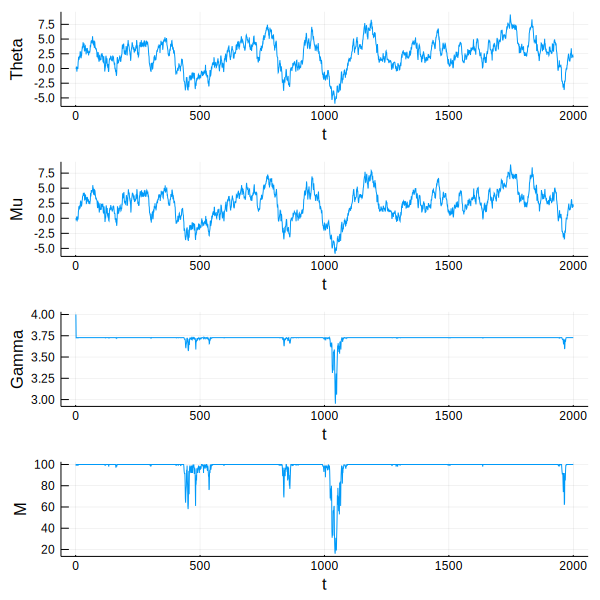

In [7]:
len = eachindex(df.θ)
yvals = [df.θ, df.μ, df.γ, df.M]
vars = ["Theta", "Mu", "Gamma", "M"]

plt = plot(layout = (4,1), size = (600, 600))

for i in 1:4
    plot!(plt[i], len, yvals[i], xlabel = "t", ylabel = vars[i], label = "")
end

plot(plt)